0.43841745621520983
0.21930054770926288


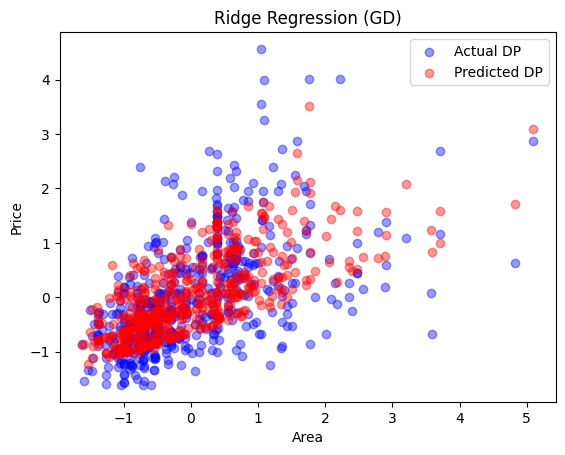

In [1]:
# Ridge(L2) Regression using GD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

csv=pd.read_csv('Housing.csv')
# print(csv.head())
x_pn = np.array(
    csv[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_pn = np.array(csv['price'])

# normalizing
# x_pn has (545,5) shape, if we don't fix axis, then it find combined mean for all the elements
x = (x_pn-np.mean(x_pn,axis=0))/np.std(x_pn,axis=0)
y = (y_pn-np.mean(y_pn))/np.std(y_pn)

try:
    def RidgeRegression_GD(x,y,learning_rate,L_2,iteration):
        n=len(y)
        y=y.reshape(-1,1)
        X=np.c_[np.ones((n,1)),x]
        beta=np.zeros((X.shape[1],1))

        for _ in range(iteration):
            y_pred= X @ beta
            cf=y_pred-y
            # gradient
            dm=(1/n)*(X.T @ cf)+(L_2/n)*beta
            beta-=learning_rate*dm
        
        # prediction
        y_predicted=X @ beta

        # model evaluation
        mse = mean_squared_error(y_predicted,y)
        r2=r2_score(y_predicted,y)
        print(mse)
        print(r2)
        

        # plotting
        plt.scatter(x[:,0],y,color='blue',alpha=0.4,label='Actual DP')
        plt.scatter(x[:,0],y_predicted,color='red',alpha=0.4,label='Predicted DP')
        plt.legend()
        plt.xlabel('Area')
        plt.ylabel('Price')
        plt.title('Ridge Regression (GD)')
        plt.show()

    RidgeRegression_GD(x, y, 0.1, 0.01, 10000)
    # learning rate: 0.1
    # L_2: 0.01


except Exception as e:
        print(e)